In [168]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython import get_ipython
ipy = get_ipython()
if ipy is not None:
    ipy.run_line_magic('matplotlib', 'inline')

In [169]:
def display(img, cmap='gray'):
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')

In [170]:
# sep_coins = cv2.imread('D:\Dev\OpenCV\images\pennies.jpg')
# sep_blur = cv2.medianBlur(sep_coins, 15)
# gray_sep_coins = cv2.cvtColor(sep_blur, cv2.COLOR_BGR2GRAY)
# ret, sep_thresh = cv2.threshold(gray_sep_coins, 160, 255, cv2.THRESH_BINARY_INV)
# 
# contours, hierarchy = cv2.findContours(sep_thresh.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
# 
# for i in range(len(contours)):
#     if hierarchy[0][i][3] == -1:
#         cv2.drawContours(sep_coins, contours, i, (255, 0, 0), 10)
# 
# display(sep_coins)

In [171]:
img = cv2.imread('D:\Dev\OpenCV\images\pennies.jpg')

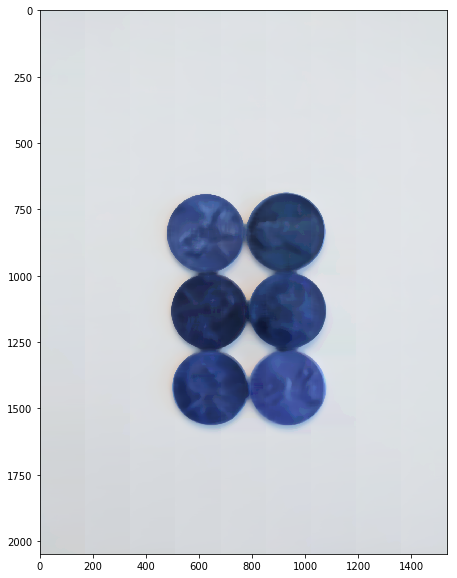

In [178]:
display(img)

In [179]:
img = cv2.medianBlur(img, 25)

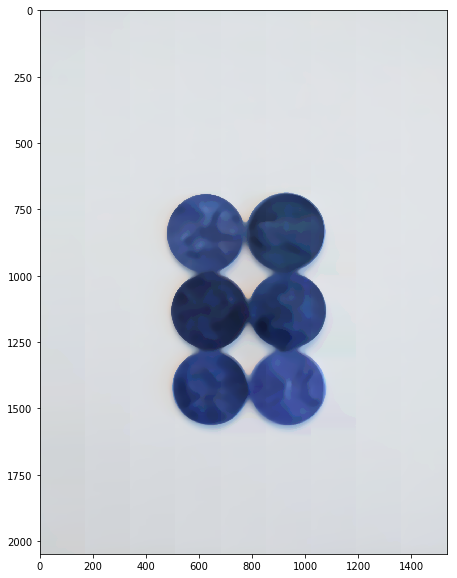

In [180]:
display(img)

In [181]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [182]:
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

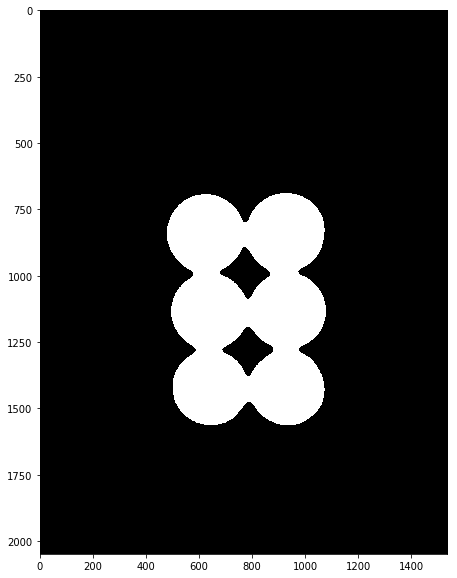

In [183]:
display(thresh)

In [184]:
# NOISE REMOVAL (OPTIONAL)

In [185]:
kernel = np.ones((3, 3), dtype=np.uint8)

In [186]:
kernel

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=uint8)

In [187]:
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

In [188]:
opening

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

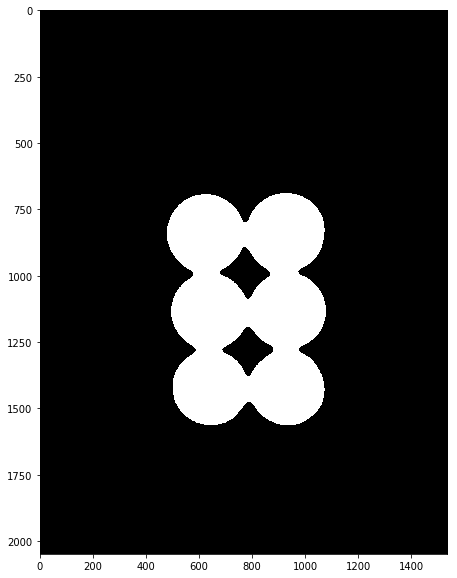

In [189]:
display(opening)

In [190]:
# Dilate to get Sure Background Area

In [191]:
sure_bg = cv2.dilate(opening, kernel, iterations=3)

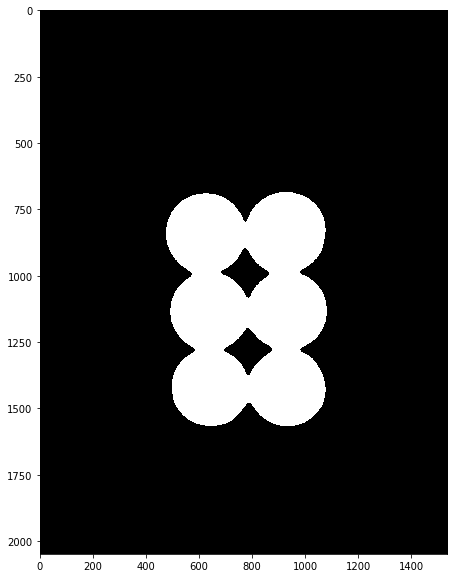

In [192]:
display(sure_bg)

In [193]:
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)

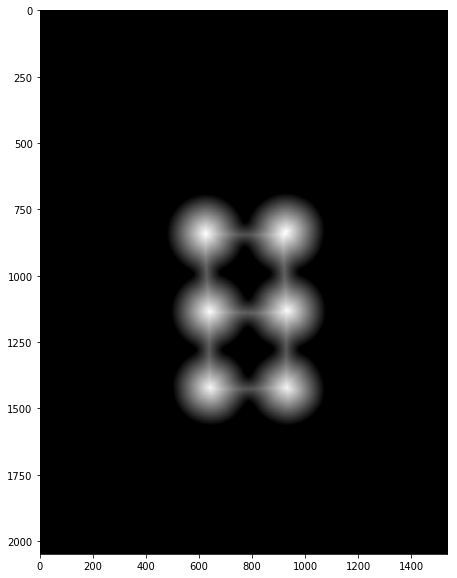

In [194]:
display(dist_transform)

In [195]:
ret, sure_fg = cv2.threshold(dist_transform, 0.7*dist_transform.max(), 255, 0)

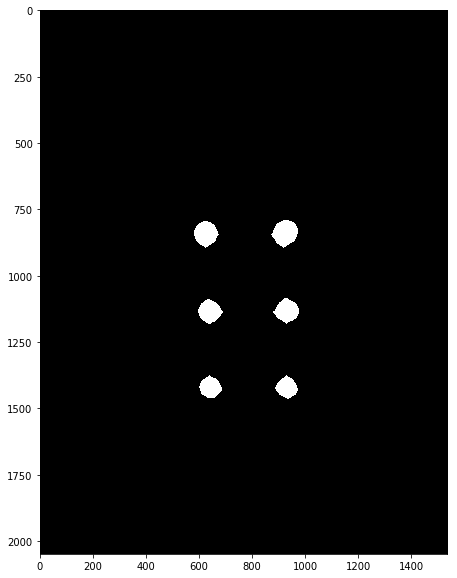

In [196]:
display(sure_fg)

In [197]:
sure_fg = np.uint8(sure_fg)

In [198]:
unknown_region = cv2.subtract(sure_bg, sure_fg)

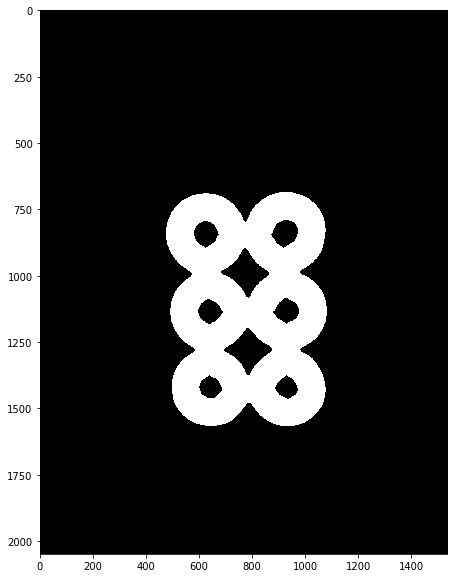

In [199]:
display(unknown_region)

In [200]:
# Create Label markers for Watershed Algorithm
# a. Get the markers

In [201]:
ret, markers = cv2.connectedComponents(sure_fg)

In [202]:
markers = markers + 1

In [203]:
markers

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=int32)

In [204]:
markers[unknown_region == 255] = 0

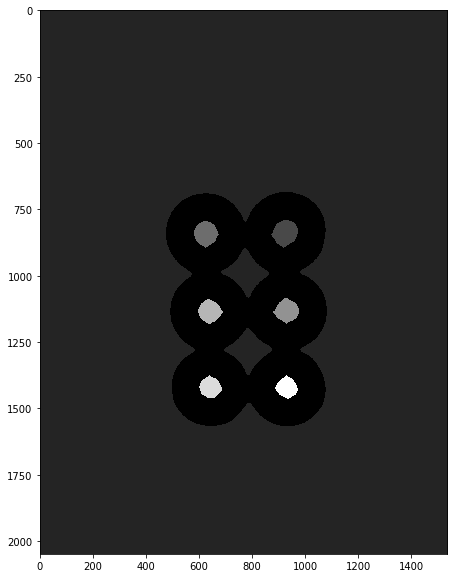

In [205]:
display(markers)

In [206]:
# Apply the Watershed Algorithm to flood the unknown area

In [207]:
markers = cv2.watershed(img, markers)

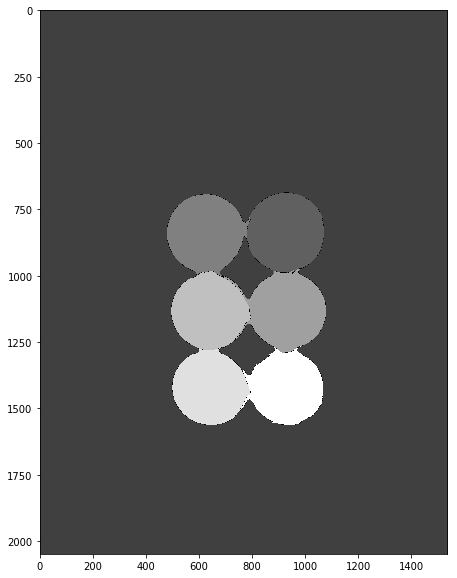

In [208]:
display(markers)

In [209]:
contours, hierarchy = cv2.findContours(markers.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

for i in range(len(contours)):
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(sep_coins, contours, i, (255, 0, 0), 10)

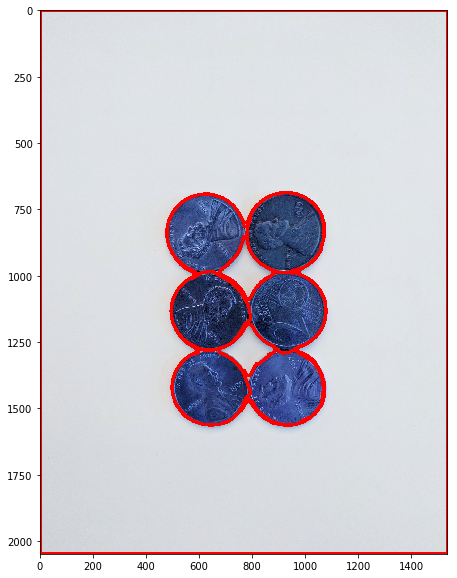

In [210]:
display(sep_coins)